# Project #15: Twitter hate speech detection 2

## 1. Introduction


The goal of our project is to find efficient methods for identifying hate speech on twitter. Our aim is to find a set of features that could be used to identify hate speech content.

For our analysis, we have gathered two data sets. The first data set was collected by searching for tweets containing specific hashtags (topics). The second data set was collected from active twitter users that frequently posted hate speech content. Both data sets were obtained using Twitter API and the search-tweets pytho library.

Full source code and data sets are available at: https://github.com/tokuosma/NLP2019


In [1]:
# Standard libraries
import sys; sys.path.insert(0, '..') # add parent folder to path

#3rd. party
import pandas as pd
import matplotlib.pyplot as plt
import emojis 
import numpy as np

# Custom scripts
import liwc_empath
import util

# Dictionary keys
CATEGORY_HATE = "hate_speech"
CATEGORY_NON_HATE = "non_hate_speech"
ENTITY_HATE = "hate_speech"
ENTITY_NON_HATE = "non_hate_speech"

font = {'family' : 'normal',        
        'size'   : 12}



## 2. Data sets

### Data-set 1: Hate speech hash tags
The first data set was collected by searching for tweets containing specific hashtags that were provided to us in the project assignment. The hash tags were: #terrorist, #radicalist, #islamophobia, #extremist, and #bombing. 


In [2]:
# Read labeled tweets with specific hash tags
tweets_hashtag = {}
tweets_hashtag["bombing"] = util.read_tweets(["../Data/tweets_bombing_labeled.json"])
tweets_hashtag["extremist"] = util.read_tweets(["../Data/tweets_extremist_labeled.json"])
tweets_hashtag["islamophobia"] = util.read_tweets(["../Data/tweets_islamophobia_labeled.json"])
tweets_hashtag["radicalist"] = util.read_tweets(["../Data/tweets_radicalist_labeled.json"])
tweets_hashtag["terrorist"] = util.read_tweets(["../Data/tweets_terrorist_labeled.json"])

print('Hashtag summaries: ')
for key in tweets_hashtag.keys():
    util.print_hashtag_summary(key, tweets_hashtag[key])

# Read the combined labeled data set
labeled_tweets = util.read_tweets(["../Data/tweets_labeled_combined.json"])

num_hate = len([x for x in labeled_tweets if x['hate_speech']])
num_non_hate = len([x for x in labeled_tweets if not x['hate_speech']])

print('All labeled tweets: Number of hate speech = {0:d}, Number of non-hate speech = {1:d}'.format(num_hate, num_non_hate))


Hashtag summaries: 
#bombing: Number of hate speech = 2, Number of non hate speech = 195, Total number of tweets = 197
Oldest tweet date: 2019-11-23
Newest tweet date: 2019-12-13


#extremist: Number of hate speech = 6, Number of non hate speech = 368, Total number of tweets = 374
Oldest tweet date: 2019-11-13
Newest tweet date: 2019-12-13


#islamophobia: Number of hate speech = 12, Number of non hate speech = 158, Total number of tweets = 170
Oldest tweet date: 2019-12-12
Newest tweet date: 2019-12-13


#radicalist: Number of hate speech = 0, Number of non hate speech = 13, Total number of tweets = 13
Oldest tweet date: 2019-11-14
Newest tweet date: 2019-12-13


#terrorist: Number of hate speech = 117, Number of non hate speech = 334, Total number of tweets = 451
Oldest tweet date: 2019-12-11
Newest tweet date: 2019-12-13


All labeled tweets: Number of hate speech = 137, Number of non-hate speech = 1068


## 3. Characterization of the labeled data set

### 3.1 Sentiment analysis
TEXT HERE

In [3]:
# CODE HERE

### 3.2 LIWC Features

To analyze the topics and categories common to hate and non hate speech we use the Empath library. Empath is an open source alternative to proprietary LIWC software. The library offers tools that can extract themes and topics from a given text. The library come with a default set of categories but new categories can be added by the users. We will use the default categories.

The following code uses the labeled tweet data set to extract the most common topics from the labeled tweet data sets. Each topic is then given a normalized score which is simply the number of mentions a topic has divided by the total number of tweets in the category.

Top 20 topics in hate tweets:
negative_emotion: 0.2847
hate: 0.2701
children: 0.219
family: 0.2117
love: 0.2044
youth: 0.1898
emotional: 0.1752
affection: 0.1752
kill: 0.1679
war: 0.1168
crime: 0.1168
appearance: 0.1168
speaking: 0.1095
fight: 0.1095
government: 0.1022
giving: 0.0949
disgust: 0.0949
communication: 0.0949
terrorism: 0.0876
leader: 0.0876

Top 20 topics in non hate tweets:
negative_emotion: 0.1713
war: 0.1573
fight: 0.1311
speaking: 0.1301
crime: 0.1264
communication: 0.1124
government: 0.1105
aggression: 0.1105
kill: 0.1067
politics: 0.0946
terrorism: 0.0927
weapon: 0.089
positive_emotion: 0.0871
violence: 0.0758
power: 0.074
business: 0.0712
giving: 0.0693
hate: 0.0684
law: 0.0665
leader: 0.0655


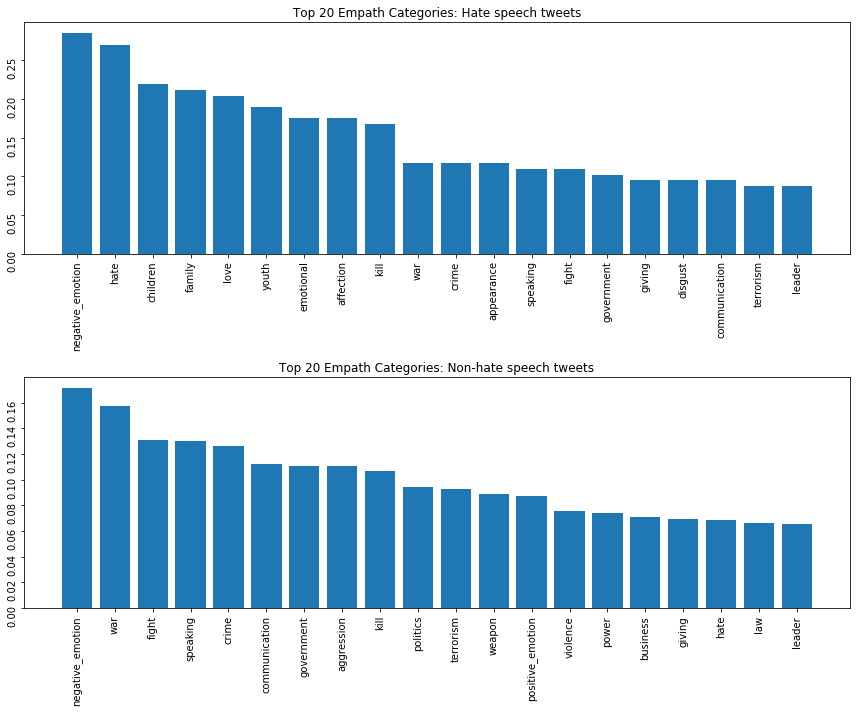

In [4]:
from liwc_empath import analyze_tweets_liwc

liwc_categories = analyze_tweets_liwc(labeled_tweets)

print("Top 20 topics in hate tweets:")
for i in range(20):
    print(liwc_categories[CATEGORY_HATE][i][0]+ ": " + str(round(liwc_categories[CATEGORY_HATE][i][1],4)))
    
print("\nTop 20 topics in non hate tweets:")
for i in range(20):
    print(liwc_categories[CATEGORY_NON_HATE][i][0]+ ": " + str(round(liwc_categories[CATEGORY_NON_HATE][i][1],4)))

# Draw top 20 categories    
categories_hate = [x for (x,y) in liwc_categories[CATEGORY_HATE][:20]]                                      
values_hate = [y for (x,y) in liwc_categories[CATEGORY_HATE][:20]]

categories_non_hate = [x for (x,y) in liwc_categories[CATEGORY_NON_HATE][:20]]                                     
values_non_hate = [y for (x,y) in liwc_categories[CATEGORY_NON_HATE][:20]]

fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)

axs[0].bar(categories_hate, values_hate)
axs[0].set_title("Top 20 Empath Categories: Hate speech tweets")
axs[0].tick_params(labelrotation=90)

axs[1].bar(categories_non_hate, values_non_hate)
axs[1].set_title("Top 20 Empath Categories: Non-hate speech tweets")
axs[1].tick_params(labelrotation=90)

plt.tight_layout()
fig.savefig("liwc_topics")


Considering the hashtags that were used to collect the tweets, it is not suprising to find negative and violent topics are present in both data sets. The topic hate is more pronounced in the hate speech data set. Suprisingly, themes like children, family and love are some of the most common topics in the hate data set.

### 3.3 Emoticon usage
We will investigate the usage of emoticons in hate and non hate tweets by examining the types of emoticons used and their frequency. 

Emoticon usage in hate and non hate tweets:

Total number of tweets containing emoticons in hate speech tweets: 22 (16.06%)
Total number of tweets containing emoticons in non hate speech tweets: 154 (14.42%)

Emoticons in hate speech:
😂(:joy:): 5.11%
😡(:pout:): 4.38%
🇬🇧(:uk:): 1.46%
👍(:thumbsup:): 1.46%
😏(:smirk:): 1.46%
🙄(:roll_eyes:): 1.46%
💪(:muscle:): 1.46%
👏(:clap:): 1.46%
😊(:blush:): 1.46%
✌️(:v:): 0.73%
🛑(:stop_sign:): 0.73%
✡️(:star_of_david:): 0.73%
🎇(:sparkler:): 0.73%
🐍(:snake:): 0.73%
☠(:skull_and_crossbones:): 0.73%
💀(:skull:): 0.73%
👆(:point_up_2:): 0.73%
👇(:point_down:): 0.73%
😔(:pensive:): 0.73%
🕎(:menorah:): 0.73%
🇮🇱(:israel:): 0.73%
🎆(:fireworks:): 0.73%
😥(:disappointed_relieved:): 0.73%
💐(:bouquet:): 0.73%
💙(:blue_heart:): 0.73%

Emoticons in non hate speech:
🔚(:end:): 5.43%
🔔(:bell:): 5.43%
👉(:point_right:): 2.81%
😂(:joy:): 1.03%
👇(:point_down:): 0.66%
😉(:wink:): 0.56%
🔥(:fire:): 0.56%
🇺🇸(:us:): 0.47%
🇬🇧(:uk:): 0.47%
🤣(:rofl:): 0.47%
😡(:pout:): 0.47%
💪(:muscle:): 0.

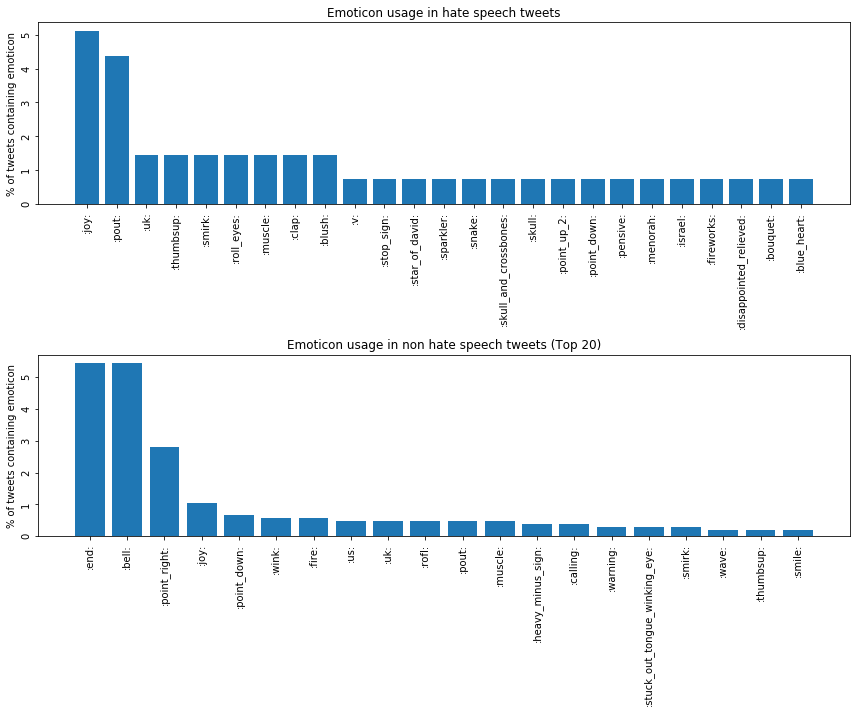

In [5]:
from count_emoticons import count_tweet_emoticons

# Retuns two lists containing the types of emoticons and their frequency in both hate and non hate categories
tweet_emoticons = count_tweet_emoticons(labeled_tweets)

print("Emoticon usage in hate and non hate tweets:\n")

print("Total number of tweets containing emoticons in hate speech tweets: {0:d} ({1:1.2f}%)".format(tweet_emoticons['hate_total'],tweet_emoticons['hate_total'] /num_hate * 100 ))
print("Total number of tweets containing emoticons in non hate speech tweets: {0:d} ({1:1.2f}%)".format(tweet_emoticons['non_hate_total'], tweet_emoticons['non_hate_total'] /num_non_hate * 100))
    
# Normalize emoticon counts by calculating the fraction of tweets containing
# each emoticon in both categories.
tweet_emoticons[CATEGORY_HATE] = [(x, y / num_hate) for x,y in tweet_emoticons[CATEGORY_HATE]]
tweet_emoticons[CATEGORY_NON_HATE] = [(x, y / num_non_hate) for x,y in tweet_emoticons[CATEGORY_NON_HATE]]   

print("\nEmoticons in hate speech:")
for emoticon in tweet_emoticons[CATEGORY_HATE]:
    print("{0}({1}): {2:1.2f}%".format(emojis.encode(emoticon[0]),emoticon[0], emoticon[1] * 100))

print("\nEmoticons in non hate speech:")
for emoticon in tweet_emoticons[CATEGORY_NON_HATE]:
    print("{0}({1}): {2:1.2f}%".format(emojis.encode(emoticon[0]),emoticon[0], emoticon[1] * 100))
    
emoticons_hate = [x for (x,y) in tweet_emoticons[CATEGORY_HATE]]
emoticons_percentage_hate = [y * 100 for (x,y) in tweet_emoticons[CATEGORY_HATE]]

emoticons_non_hate = [x for (x,y) in tweet_emoticons[CATEGORY_NON_HATE][:20]]
emoticons_percentage_non_hate = [y * 100 for (x,y) in tweet_emoticons[CATEGORY_NON_HATE][:20]]
        
fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)
axs[0].bar(emoticons_hate, emoticons_percentage_hate)
axs[0].set_title("Emoticon usage in hate speech tweets")
axs[0].tick_params(labelrotation=90)
axs[0].set_ylabel('% of tweets containing emoticon')
axs[1].bar(emoticons_non_hate, emoticons_percentage_non_hate )
axs[1].set_title("Emoticon usage in non hate speech tweets (Top 20)")
axs[1].tick_params(labelrotation=90)
axs[1].set_ylabel('% of tweets containing emoticon')

plt.tight_layout()
fig.savefig("emoticons")


The hate speech tweets contained a total of 22 tweets which contained emoticons. The percentage of tweets containing emoticons was roughly the same in both categories.

The most common emoticons used in the hate speech, :joy: and :pout:,  don't really stand out and are frequently used in non hate context, although both seem to be more common in our hate speech data set. 

The two most common emoticons in the non hate speech data set were :exit: and :bell:. It turns out both emoticons were frequently used by opponents of Jeremy Corbyn, who were active during the British general election that occured in december, at the same time we were collection our data sets. 

### 3.4 Named entities
TEXT HERE

Top 20 named entities in hate tweets: 
UK:0.1168
Terrorist:0.073
Islamophobia:0.0584
Westminster:0.0511
#sympathiser #Antisemitic #:0.0511
#ComradeCorbyn #:0.0511
Parliament:0.0438
Pakistan:0.0438
Jews:0.0438
JeremyCorbyn:0.0438
Tories:0.0365
LabourParty:0.0365
Labour:0.0365
Communist:0.0365
British:0.0292
tomorrow:0.0219
first:0.0219
NeverCorbyn:0.0219
Nazis:0.0219
Muslims:0.0219

Top 20 topics in non hate tweets:
Islamophobia: 0.0908
India: 0.0487
#extremist: 0.0337
#ComradeCorbyn #CorbynNeutral: 0.0337
UK: 0.0309
#CorbynOut #NeverCorbyn: 0.0309
#RSS #BJP: 0.0272
Pakistan: 0.0243
US: 0.0215
#HINDU #: 0.0215
#graffitiberlin #fotoboom #bombing #: 0.0206
Terrorist: 0.0197
#berlin #: 0.0197
Muslim: 0.0178
Muslims: 0.0169
Kashmir: 0.0159
#граффити — ©: 0.0159
Morocco: 0.015
British: 0.015
Corbyn: 0.014


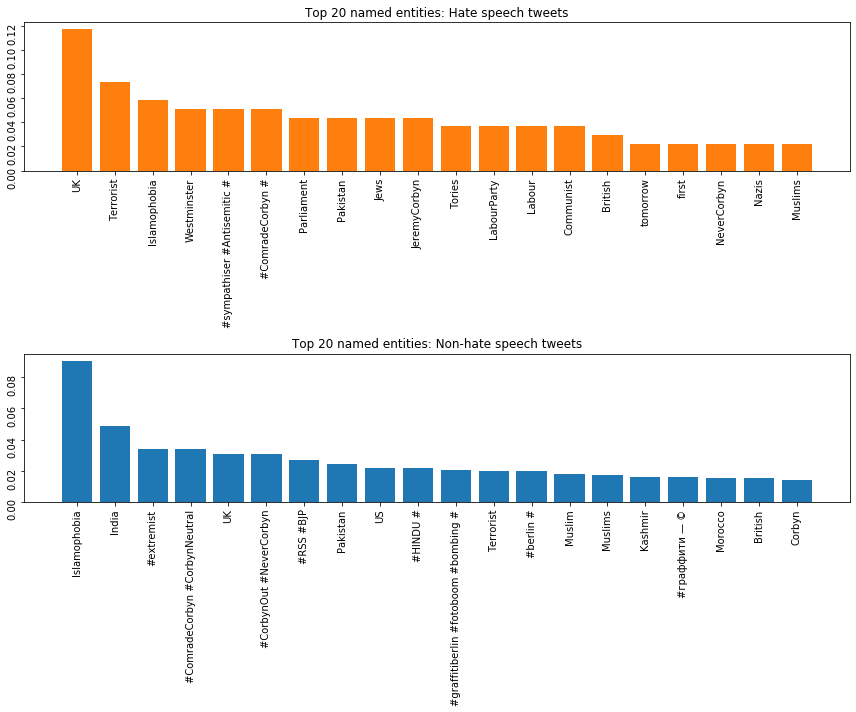

In [6]:
from named_entities import get_named_entities

entities = get_named_entities(labeled_tweets)

print("Top 20 named entities in hate tweets: ")
for i in range(20):
    print(entities[ENTITY_HATE][i][0]+ ":" + str(round(entities[ENTITY_HATE][i][1],4)))
    
print("\nTop 20 topics in non hate tweets:")
for i in range(20):
    print(entities[ENTITY_NON_HATE][i][0]+ ": " + str(round(entities[ENTITY_NON_HATE][i][1],4)))

# Draw top 20 entities
entities_hate = [x for (x,y) in entities[ENTITY_HATE][:20]]

freqs_hate = [y for (x,y) in entities[ENTITY_HATE][:20]]

entities_non_hate = [x for (x,y) in entities[ENTITY_NON_HATE][:20]]

freqs_non_hate = [y for (x,y) in entities[ENTITY_NON_HATE][:20]]

fig, axs = plt.subplots(2,1,figsize=(12,10), sharey=False)

axs[0].bar(entities_hate,freqs_hate)

axs[0].bar(entities_hate, freqs_hate)
axs[0].set_title("Top 20 named entities: Hate speech tweets")
axs[0].tick_params(labelrotation=90)

axs[1].bar(entities_non_hate,freqs_non_hate)
axs[1].set_title("Top 20 named entities: Non-hate speech tweets")
axs[1].tick_params(labelrotation=90)

plt.tight_layout()
fig.savefig("named entities")

### 3.5 Named phrases
TEXT HERE

## 4. Radicalization of active hate speakers

In [7]:
# CODE HERE
from analyse_user import analyse_users
import pandas as pd

first_user = analyse_users('..\\Data\\tweets_user_ViidarUkonpoika.json')
second_user = analyse_users('..\\Data\\tweets_user_UKInfidel.json')
third_user = analyse_users('..\\Data\\tweets_user_DrDavidDuke.json')


print('file: ' + first_user["source_file"])
print('mean sentiment percentile: ' + str(first_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(first_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(first_user["vol_very_neg_posts"]))
print('number of days active: '+ str(first_user["days_active"]))
print('radicalization score: '+ str(first_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in first_user["very_neg_tweets_and_sentiments"]]


print('file: ' + second_user["source_file"])
print('mean sentiment percentile: ' + str(second_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(second_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(second_user["vol_very_neg_posts"]))
print('number of days active: '+ str(second_user["days_active"]))
print('radicalization score: '+ str(second_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in second_user["very_neg_tweets_and_sentiments"]]


print('file: ' + third_user["source_file"])
print('mean sentiment percentile: ' + str(third_user["mean_sentiment_perc"]))
print('volume of negative posts: ' + str(third_user["vol_neg_posts"]))
print('volume of very negative posts:' + str(third_user["vol_very_neg_posts"]))
print('number of days active: '+ str(third_user["days_active"]))
print('radicalization score: '+ str(third_user["radicalization_score"]))
print('\n\n')
# print('very negative post and their sentiments:')
# [print(str(item[0]),item[1]) for item in third_user["very_neg_tweets_and_sentiments"]]

first_df = pd.DataFrame(first_user["sentiments"], columns = ['sentiment'])
first_df.plot.hist(bins=50)

second_df = pd.DataFrame(second_user["sentiments"], columns = ['sentiment'])
second_df.plot.hist(bins=50)

third_df = pd.DataFrame(third_user["sentiments"], columns = ['sentiment'])
third_df.plot.hist(bins=50)

FileNotFoundError: [Errno 2] No such file or directory: '..\\Data\\tweets_user_ViidarUkonpoika.json'